<a href="https://colab.research.google.com/github/DataEtnos/Dashboard-de-vendas-de-jogos-de-video-game/blob/main/CASE_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Desafio final de classificação em Data Science</h1><h2>Introdução</h2><ul><li>Último desafio do curso de Data Science, na parte de classificação</li><li>Caso completo de churn para preparar para o mercado de trabalho</li></ul><h2>Metodologia</h2><ul><li>Seguir o CRISP-DM</li><li>Entendimento das variáveis e dos dados</li><li>Análise descritiva exploratória</li><li>Escolha dos modelos de classificação<ul><li>Planejamento dos modelos</li><li>Análise dos resultados</li><li>Decisão sobre qual implementar</li></ul></li><li>Análise das métricas</li><li>Identificação do melhor modelo pelo desempenho</li>

In [430]:
!pip install yellowbrick

In [431]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from  sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [432]:
df= pd.read_excel("/content/churn_data.xlsx")

In [433]:
#Visualizando os dados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [434]:
df = df.drop(['customerID'], axis=1)

In [435]:
#Contando a quantidade de churns
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [436]:
#verifcando se tem nulos e 0 tipo de cada item
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [437]:
#verificando a distribuição dos dados pelo porcentil , contagem media e desvio padrão
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [438]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [439]:
x= df.drop(['Churn'], axis=1)
y= df['Churn']

In [440]:
ordnial = OrdinalEncoder()
x= ordnial.fit_transform(x)


Lb = LabelEncoder()
y= Lb.fit_transform(y)


In [441]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [442]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [443]:
 lr = LogisticRegression(max_iter=200,
           n_jobs=None)


 lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [444]:
lr.score(x_test, y_test)

0.795260663507109

In [445]:
lr.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [446]:
x = pd.DataFrame(x)

In [447]:
acuracia = accuracy_score(y_test, lr.predict(x_test))
print(f"acuracia do modelo sem tunar : {acuracia*100:.2f}%")

acuracia do modelo sem tunar : 79.53%


0.795260663507109

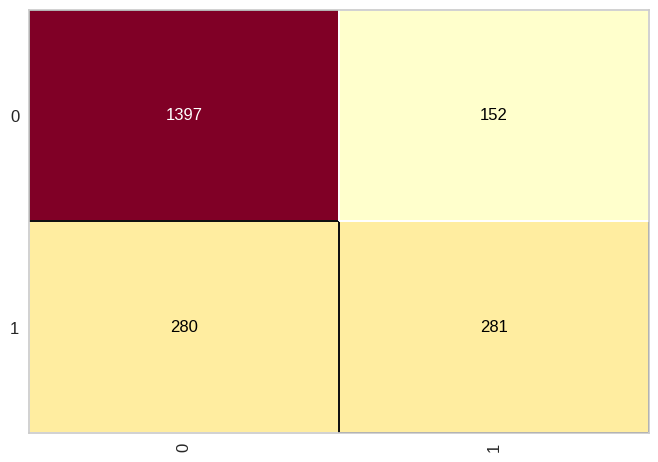

In [448]:
fig = ConfusionMatrix(lr)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


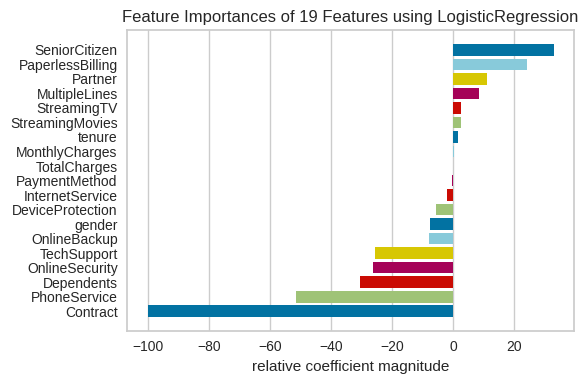

<Axes: title={'center': 'Feature Importances of 19 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [449]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(lr)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()

In [450]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [451]:
dt.score(x_test, y_test)

0.7170616113744076

In [452]:
acuracia = accuracy_score(y_test, dt.predict(x_test))
print(f"acuracia do modelo sem tunar : {acuracia*100:.2f}%")

acuracia do modelo sem tunar : 71.71%


0.7170616113744076

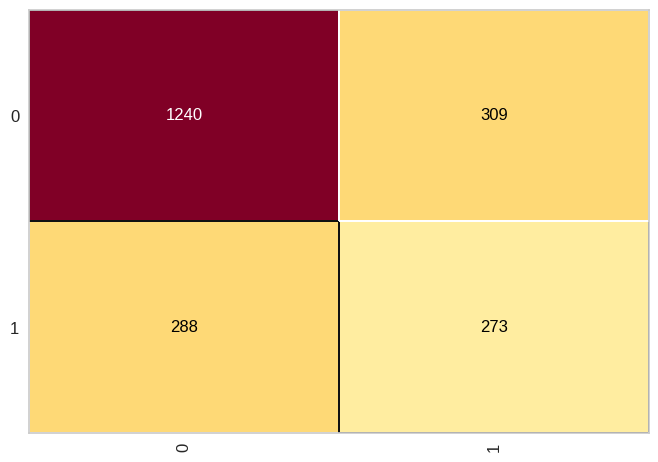

In [453]:
fig = ConfusionMatrix(dt)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

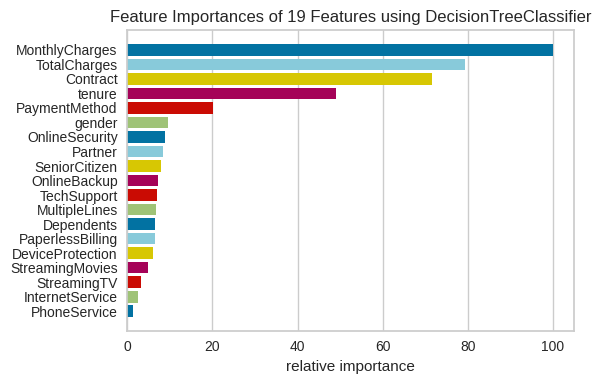

<Axes: title={'center': 'Feature Importances of 19 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [454]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(dt)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()

In [455]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [456]:
rf.score(x_test, y_test)

0.7824644549763033

In [457]:
acuracia = accuracy_score(y_test,rf.predict(x_test))
print(f"acuracia do modelo sem tunar : {acuracia*100:.2f}%")

acuracia do modelo sem tunar : 78.25%


0.7824644549763033

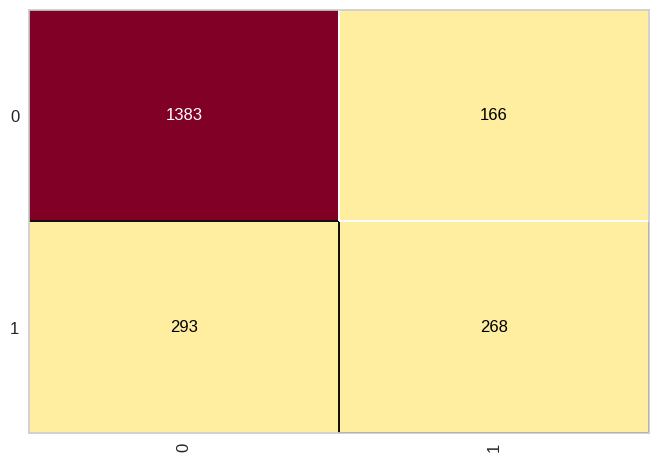

In [458]:
fig = ConfusionMatrix(rf)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

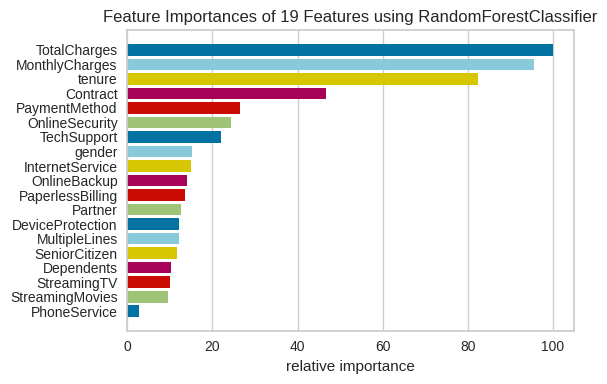

<Axes: title={'center': 'Feature Importances of 19 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [459]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(rf)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()

#GRID SEARCH

-  Tunagem da metricas.


In [460]:
grid_search = GridSearchCV(dt, parameters,scoring='accuracy',cv=5 , n_jobs = -1)
grid_search.fit(x_train, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [461]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by ='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.025514,0.010755,0.002707,0.001738,4,{'max_depth': 4},0.780711,0.778680,0.800813,0.783537,0.800813,0.788911,0.009840,1
2,0.043846,0.007105,0.004411,0.003106,3,{'max_depth': 3},0.784772,0.782741,0.786585,0.780488,0.794715,0.785860,0.004873,2
4,0.054224,0.007406,0.004402,0.003717,5,{'max_depth': 5},0.780711,0.771574,0.791667,0.775407,0.794715,0.782815,0.009007,3
5,0.048445,0.008944,0.005607,0.004494,6,{'max_depth': 6},0.785787,0.771574,0.781504,0.775407,0.789634,0.780781,0.006597,4
6,0.036040,0.012924,0.004612,0.005422,7,{'max_depth': 7},0.778680,0.764467,0.777439,0.773374,0.788618,0.776516,0.007836,5
7,0.031866,0.015774,0.002771,0.001445,8,{'max_depth': 8},0.791878,0.748223,0.772358,0.757114,0.784553,0.770825,0.016327,6
1,0.011812,0.004297,0.002122,0.000455,2,{'max_depth': 2},0.772589,0.745178,0.733740,0.771341,0.772358,0.759041,0.016398,7
8,0.045109,0.015547,0.003494,0.003223,9,{'max_depth': 9},0.774619,0.736041,0.767276,0.751016,0.762195,0.758230,0.013495,8
9,0.065033,0.035010,0.003729,0.002407,10,{'max_depth': 10},0.771574,0.741117,0.750000,0.744919,0.741870,0.749896,0.011280,9
0,0.008140,0.004021,0.001671,0.000095,1,{'max_depth': 1},0.734010,0.734010,0.733740,0.734756,0.734756,0.734254,0.000421,10


In [462]:
print(f"Acurácia teste: {accuracy_score(y_test, grid_search.predict(x_test))}%")
print(f"Acurácia treino: {accuracy_score(y_train, grid_search.predict(x_train))}%")

Acurácia teste: 0.7819905213270142%
Acurácia treino: 0.7972368955709062%


In [463]:
 grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [464]:
dt_tunado = DecisionTreeClassifier(
  ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 4,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter='best')

dt_tunado.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [465]:
acuracia = accuracy_score(y_test, dt_tunado.predict(x_test))
print(f" Acuracia da Arvoré Tunada : {acuracia*100:.2f}%")

 Acuracia da Arvoré Tunada : 78.15%


0.7815165876777251

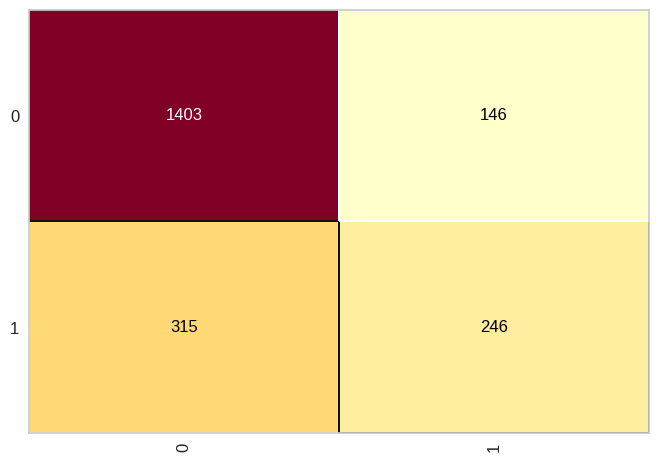

In [490]:
fig = ConfusionMatrix(dt_tunado)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

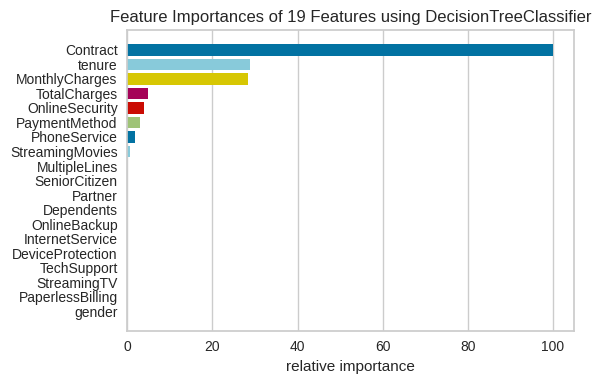

<Axes: title={'center': 'Feature Importances of 19 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [491]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(dt_tunado)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()

In [466]:
# Definindo a grade de parâmetros para o GridSearch
param_grid = {

  }

In [467]:
grid_search = GridSearchCV(lr,param_grid,scoring='accuracy',cv=5 , n_jobs = -1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200), n_jobs=-1,
             param_grid={}, scoring='accuracy')

In [468]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by ='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.251658,0.057618,0.004433,0.00407,{},0.806091,0.788832,0.806911,0.804878,0.818089,0.80496,0.009355,1


In [469]:
 grid_search.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [470]:
lr_tunado = LogisticRegression(
  C=1.0,
 class_weight= None,
 dual=False,
 fit_intercept=True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 200,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

lr_tunado.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [478]:
acuracia = accuracy_score(y_test, lr_tunado.predict(x_test))
print(f" Acuracia da  regressão logistica Tunada : {acuracia*100:.2f}%")

 Acuracia da  regressão logistica Tunada : 79.53%


0.795260663507109

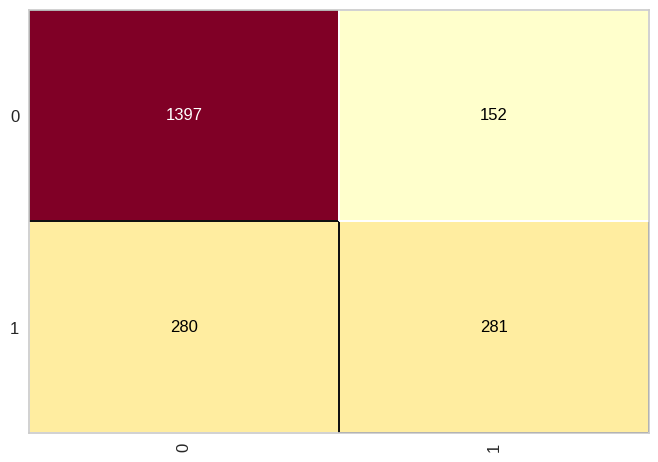

In [493]:
fig = ConfusionMatrix(lr_tunado)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


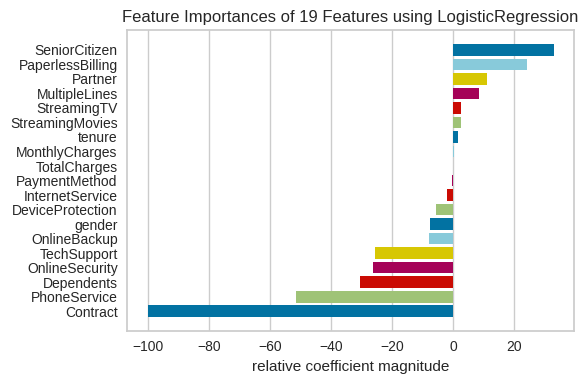

<Axes: title={'center': 'Feature Importances of 19 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [492]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(lr_tunado)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()

In [480]:
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [100,300,500],
}

grid_search = GridSearchCV(rf,parameters , scoring='accuracy',cv=5 , n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [481]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by ='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,4.106168,0.983066,0.138680,0.003419,8,500,"{'max_depth': 8, 'n_estimators': 500}",0.793909,0.792893,0.801829,0.808943,0.822154,0.803946,0.010807,1
19,1.889547,0.014549,0.078759,0.002476,7,300,"{'max_depth': 7, 'n_estimators': 300}",0.791878,0.790863,0.800813,0.803862,0.826220,0.802727,0.012770,2
20,4.069331,0.843223,0.162769,0.050840,7,500,"{'max_depth': 7, 'n_estimators': 500}",0.792893,0.792893,0.799797,0.805894,0.821138,0.802523,0.010496,3
21,0.678902,0.008425,0.028692,0.000346,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.802030,0.789848,0.806911,0.798780,0.815041,0.802522,0.008377,4
17,3.768059,0.718367,0.148022,0.037183,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.794924,0.792893,0.801829,0.801829,0.818089,0.801913,0.008853,5
24,0.719312,0.010866,0.030619,0.000703,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.803046,0.785787,0.796748,0.804878,0.818089,0.801710,0.010567,6
16,1.744881,0.016196,0.075221,0.003196,6,300,"{'max_depth': 6, 'n_estimators': 300}",0.787817,0.792893,0.801829,0.801829,0.820122,0.800898,0.011013,7
13,1.588170,0.022962,0.070907,0.001432,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.793909,0.793909,0.801829,0.796748,0.818089,0.800897,0.009070,8
22,2.237517,0.456161,0.111650,0.035535,8,300,"{'max_depth': 8, 'n_estimators': 300}",0.797970,0.785787,0.796748,0.804878,0.817073,0.800491,0.010303,9
18,0.630435,0.015147,0.027703,0.001574,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.795939,0.793909,0.801829,0.795732,0.815041,0.800490,0.007748,10


In [482]:
 grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [486]:
rf_tunada = RandomForestClassifier(
  bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 8,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 500,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False
)
rf_tunada.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [487]:
acuracia = accuracy_score(y_test, rf_tunada.predict(x_test))
print(f" Acuracia reandom forest Tunada : {acuracia*100:.2f}%")

 Acuracia reandom forest Tunada : 79.86%


0.7985781990521327

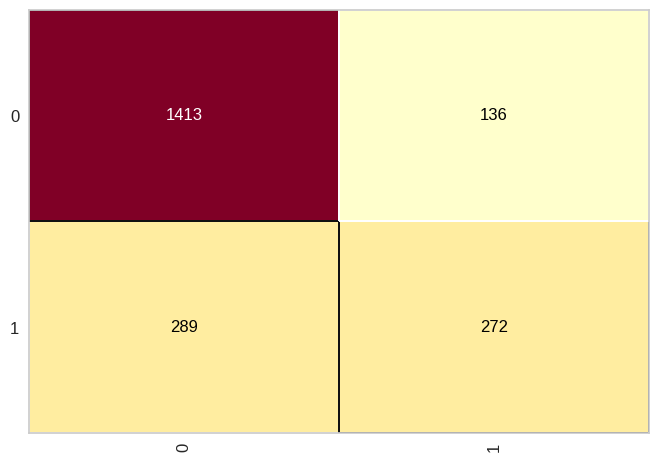

In [488]:
fig = ConfusionMatrix(rf_tunada)
fig.fit(x_train, y_train)
fig.score(x_test, y_test)

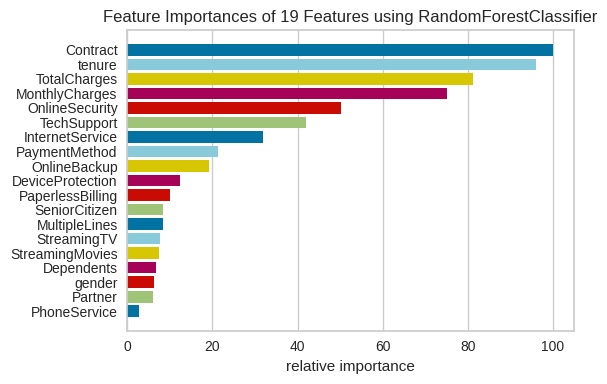

<Axes: title={'center': 'Feature Importances of 19 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [489]:
fig,ax = plt.subplots(figsize = (6,4))
figviz = FeatureImportances(rf_tunada)
figviz.fit(df.drop(['Churn'], axis=1), df['Churn'])
figviz.show()